Ох, многое в жизни непросто, но биоинформатику мы любим:🫡

Поэтому на сцене домашнее задание номер 3!

# Обязательная часть задания (8 баллов)

- На сайте github.com создаем **приватный** репозиторий и приводим ссылку на этот репозиторий в общей гугл-таблице ( **вкладка HW3** )

[https://docs.google.com/spreadsheets/d/1HItcZ\_5Z4ETo9M5MsVOE3gqNPdFEWLsyM6j1t09fwec/edit?usp=sharing](https://docs.google.com/spreadsheets/d/1HItcZ_5Z4ETo9M5MsVOE3gqNPdFEWLsyM6j1t09fwec/edit?usp=sharing)

  - Также необходимо дать доступ ассистентам () к репозиторию для будущей проверки (Settings =\> Collaborators =\> Add people):

![](RackMultipart20231109-1-95p3s2_html_7563f38078fb9535.png)

- Рекомендуется выполнять работу в Google Collab ноутбуках.
  - Если вы будете выполнять работу на сервере или на своем компьютере, необходимо будет также загрузить написанный код на Github
- Подготавливаем исходные данные для начала имплементации алгоритма GeneMark

  - Пример Google Colab ноутбука:
    - [https://colab.research.google.com/drive/1hIxAL6NfVUmT3crwuZCu2Xzre8jrNkws?usp=sharing](https://colab.research.google.com/drive/1hIxAL6NfVUmT3crwuZCu2Xzre8jrNkws?usp=sharing)
- Итогом работы будет построение графика вероятностей кодирования в трех рамках для выбранного вами участка ДНК длиной около 3кб (важно, чтобы в этом участке был хотя бы один ген и все гены были расположены на "+" цепи, размер окна 96 п.о. с шагом 12), например:

![](RackMultipart20231109-1-95p3s2_html_fba001cb7ccca9ca.png)

# Бонусная часть задания 1 (2 балла)

- Добавить на графики метки для всех start и stop кодонов, а также горизонтальными линиями соединить те пары start-stop, которые образуют открытые рамки считывания (ORF):
  - Подсказка -- для поиска открытых рамок считывания разрешается использовать сторонние библиотеки, такие как Biopython
- Сопоставить информацию про открытые рамки считывания с посчитанными вероятностями кодирования в разных рамках и выделить те ORF-ы, которые мы классифицируем как гены. Отметить эти предсказанные гены на графике также:

![](RackMultipart20231109-1-95p3s2_html_2052ecd16a27afa9.png)

# Бонусная часть задания 2 (5 баллов)

- Сделать возможным предсказание генов как на прямой, так и на обратной цепи:
  - Для этого улучшить функцию подсчета вероятностей для данной последовательности (текущего окна), чтобы она возвращала вероятности для 7 моделей, а именно 4 модели, которые были ранее (NC, COD1, COD2, COD3), плюс три возможные рамки на обратной цепи (NEG\_COD1, NEG\_COD2, NEG\_COD3)
- Обновить функцию построения графика с вероятностями кодирования, чтобы он включал 6 кодирующих панелей -- 3 для "+" цепи и 3 для "-" цепи, как это сделано в реальной выдаче GeneMark.
  - Получить график для выбранного участка ДНК, чтобы в нем был 1 ген на "+" цепи и 1 ген на "-" цепи

# Бонусная часть задания 3 (5 баллов)

- Создать полноценный _ab initio_ алгоритм GeneMark:
  - Входные данные -- файл .fasta с одним прокариотическим геномом, состоящим из одной или несколько последовательностей ДНК
  - Инициализация (первая итерация)
    - Во всех последователях ДНК найти все ORF-ы (во всех 6-ти рамках)
    - Выбрать участки ДНК, которые не содержат длинных ORF-ов (например не длиннее 90 нт) ни в одной из 6-ти рамок. Для этого можно отметить все ORF-ы длиннее 90 нт (в любой из 6-ти рамок) и участки между ними считать некодирующими. Из полученных некодирующих последовательностей, посчитать вероятности нуклеотидов нулевого и первого порядка
    - Выбрать все длинные ORF-ы (длиной более 900 нт) и по ним получать частоты первой, второй и третьей позиций кодона (COD1, COD2 и COD3).
  - Итерации
    - С полученными параметрами для моделей NC, COD1, COD2 и COD3 осуществить предсказание генов на всем геноме как на +, так и на минус цепи
    - По полученным предсказаниями генов обновить параметры моделей NC, COD1, COD2 и COD3
  - Остановка итераций и выдача результатов
    - когда ни один из генов ( или большинство генов -- например 95%) не меняют свои координаты
- Для вашей реализации алгоритма GeneMark получить полный список генов и сравнить его с тем списком, который выдал оригинальный алгоритм GeneMark из прошлого ДЗ (этот список генов мы считаем золотым стандартом)
  - Интересно оценить, какой % генов успешно предсказывается нашей версией GeneMark
  - Имейте в виду, что координата начала гена может немного варьировать, так как есть альтернативные старт-кодоны. Поэтому если у гена, предсказанного нашим GeneMark-ом, немного отличается старт-координата от оригинального GeneMark, то мы этим пренебрегаем и считаем, что ген предсказан верно

# Список файлов для сдачи

- В репозитории в файле _README_.md
  - Ссылки на google colab ноутбуки
  - График с профилями вероятностей кодирования в трех рамках участка ДНК длиной около 3кб
  - Результаты выполнения бонусной части задания
- В репозитории в папке src:
  - любой другой код, который был использован для выполнения задания


Разберем текущий код и что он делает, после чего допишем его!

### Data loading

Гайд по скачиванию:
https://www.metagenomics.wiki/tools/fastq/ncbi-ftp-genome-download

#### Этот блок кода загружает геномные данные в форматах FASTA и GenBank по URL, а затем распаковывает архивы

In [2]:
import gzip

!wget 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/355/675/GCF_000355675.1_ASM35567v1/GCF_000355675.1_ASM35567v1_genomic.fna.gz'
!wget 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/355/675/GCF_000355675.1_ASM35567v1/GCF_000355675.1_ASM35567v1_genomic.gbff.gz'

!gunzip GCF_000355675.1_ASM35567v1_genomic.fna.gz
!gunzip GCF_000355675.1_ASM35567v1_genomic.gbff.gz

--2023-11-12 18:57:26--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/355/675/GCF_000355675.1_ASM35567v1/GCF_000355675.1_ASM35567v1_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.13, 2607:f220:41e:250::13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1168222 (1.1M) [application/x-gzip]
Saving to: ‘GCF_000355675.1_ASM35567v1_genomic.fna.gz’

GCF_000355675.1_ASM 100%[===================>]   1.11M  --.-KB/s    in 0.1s    

2023-11-12 18:57:26 (10.8 MB/s) - ‘GCF_000355675.1_ASM35567v1_genomic.fna.gz’ saved [1168222/1168222]

--2023-11-12 18:57:26--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/355/675/GCF_000355675.1_ASM35567v1/GCF_000355675.1_ASM35567v1_genomic.gbff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.13, 2607:f220:41e:250::13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nl

### Reading sequences

In [3]:
!pip install bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.4/279.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.4 MB/s eta 0:00:00


#### Этот блок кода использует библиотеку Bio для чтения геномной последовательности из файлов FASTA и GenBank. Полученные данные сохраняются в переменных seq и gb

In [4]:
from Bio import SeqIO
import numpy as np
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt

seq = None
gb = None

# считываем скачанные файлы
for record in SeqIO.parse("/content/GCF_000355675.1_ASM35567v1_genomic.fna", "fasta"):
    seq = record.seq

for record in SeqIO.parse('/content/GCF_000355675.1_ASM35567v1_genomic.gbff', 'genbank'):
    gb = record

#### Этот блок кода проходит по аннотации генома и выделяет кодирующие и некодирующие последовательности. Кодирующие последовательности сохраняются в cod, а некодирующие в ncod

In [5]:
start, end = gb.features[0].location.start, None

ncod = []
cod = []

# записываем кодирующие и некодирующие последовательности
for i in range(len(gb.features)):
  feature = gb.features[i]
  fseq = feature.extract(seq)

  end = feature.location.start

  if feature.type == 'CDS' and fseq[:3] == 'ATG' and len(fseq) % 3 == 0:
    cod.append(fseq.__str__())

    if len(seq[start:end]) != 0:
      ncod.append(seq[start:end].__str__())

    start = feature.location.end

### Initial probabilities

#### Этот блок кода вычисляет начальные вероятности для каждой позиции в кодирующих и некодирующих последовательностях, и создает таблицу t1

In [6]:
def seq_probs(seq):
  return np.array([
      seq.count('T'), seq.count('C'),
      seq.count('A'), seq.count('G')
    ]) / len(seq)

def cod_probs(seq):
  res = []
  for i in range(3):
    res.append(seq_probs(seq[i::3]))
  return np.array(res)

def make_table1(cod_seqs, ncod_seqs):
  table1 = pd.DataFrame(np.vstack((cod_probs(''.join(cod_seqs)), seq_probs(''.join(ncod_seqs)))).T,
                       index=['T', 'C', 'A', 'G'],
                       columns=[f'pos{i}' for i in range(1, 4)] + ['nc'])
  return table1

In [7]:
t1 = make_table1(cod, ncod)
t1

,pos1,pos2,pos3,nc
T,0.181178,0.296080,0.315009,0.272761
C,0.206735,0.227039,0.233246,0.228978
A,0.256919,0.302102,0.238526,0.276553
G,0.355168,0.174779,0.213219,0.221708


### Transition probabilities

#### Этот блок кода вычисляет вероятности переходов между нуклеотидами для кодирующих и некодирующих последовательностей. Затем создается таблица t2, содержащая эти вероятности

In [8]:
def cod_dprobs(seqs):
  dcounts = dict(
    zip([1, 2, 3],
        [dict(zip([''.join(pair) for pair in product('TCAG', repeat=2)],
                  [0] * 16)) for i in range(3)])
    )
  for seq in seqs:
    for i in range(1, len(seq)):
      dcounts[i % 3 + 1][seq[i-1:i+1]] += 1
  return get_probs(dcounts)

def ncod_dprobs(seqs):
    dcounts = dict(zip([''.join(pair) for pair in product('TCAG', repeat=2)],
                    [0] * 16))
    for seq in seqs:
      for i in range(1, len(seq)):
        dcounts[seq[i-1:i+1]] += 1

    return get_probs({0: dcounts})[0]

def get_probs(dcounts):
  for pos in dcounts:
    nuc_groups = dict(zip('TCAG', [0] * 4))
    for dup in dcounts[pos]:
      nuc_groups[dup[0]] += dcounts[pos][dup]
    for dup in dcounts[pos]:
      dcounts[pos][dup] /= nuc_groups[dup[0]]
  return dcounts

def make_table2(cod_seqs, ncod_seqs):
  table2 = pd.DataFrame(cod_dprobs(cod_seqs))
  table2[4] = pd.Series(ncod_dprobs(ncod_seqs))
  table2.rename(columns=dict(zip(np.arange(1, 5),
                                 [f'pos{i}' for i in range(1, 4)] + ['nc'])),
                inplace=True)
  table2.index = [prob_notation(idx) for idx in table2.index.values]
  return table2

def prob_notation(st):
  return st[1] + '|' + st[0]

In [9]:
t2 = make_table2(cod, ncod)
t2

,pos1,pos2,pos3,nc
T|T,0.185527,0.497941,0.316282,0.317919
C|T,0.189643,0.199367,0.179967,0.209093
A|T,0.249195,0.172458,0.221521,0.243747
G|T,0.375635,0.130234,0.282230,0.229240
T|C,0.185286,0.248599,0.269786,0.252206
C|C,0.156258,0.198068,0.244280,0.213760
A|C,0.276169,0.315114,0.244600,0.286907
G|C,0.382287,0.238219,0.241334,0.247126
T|A,0.179924,0.333963,0.307865,0.269894
C|A,0.194132,0.213885,0.193588,0.205527


TATTACTTC
P(seq NC)=P(T|NC)*Pnc(A|T)*Pnc(T|A)*P(T|T)*P(A|T)...

In [10]:
P_seq_nc = t1['nc']['T'] * t2['nc']['A|T']*t2['nc']['T|A']*t2['nc']['T|T']*t2['nc']['A|T']*t2['nc']['C|A']*t2['nc']['T|C']*t2['nc']['T|T']*t2['nc']['C|T']
P_seq_nc

4.7912814510831735e-06

In [11]:
t2['nc']['A|T']

0.24374699430844582

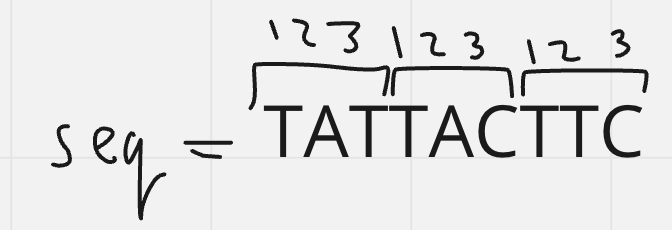

In [12]:
P_seq_cod = t1['pos1']['T']   * t2['pos2']['A|T'] * t2['pos3']['T|A'] * \
            t2['pos1']['T|T'] * t2['pos2']['A|T'] * t2['pos3']['C|A'] * \
            t2['pos1']['T|C'] * t2['pos2']['T|T'] * t2['pos3']['C|T']
P_seq_cod

9.893054273008876e-07

In [13]:
P_nc = 0.5
P_cod = 0.5
P_nc_seq = P_nc * P_seq_nc / (P_nc * P_seq_nc + P_cod * P_seq_cod)
P_nc_seq

0.8288572686278104

In [14]:
P_cod_seq = P_cod * P_seq_cod / (P_nc * P_seq_nc + P_cod * P_seq_cod)
P_cod_seq

0.17114273137218963

In [15]:
1-P_nc_seq

0.1711427313721896

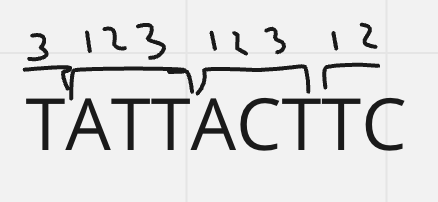

In [16]:
P_seq_cod2 = t1['pos3']['T'] * \
            t2['pos1']['A|T'] * t2['pos2']['T|A'] * t2['pos3']['T|T'] * \
            t2['pos1']['A|T'] * t2['pos2']['C|A'] * t2['pos3']['T|C'] * \
            t2['pos1']['T|T'] * t2['pos2']['C|T']
P_seq_cod2

4.409967752533561e-06

### Prediction

#### Этот блок содержит функции для предсказания вероятности кодирования для заданной последовательности и рамки

#### Функции cod_proba и ncod_proba вычисляют логарифм вероятности кодирования для кодирующих и некодирующих последовательностей соответственно. Функция get_cod_probs вычисляет вероятности для всех рамок и некодирующей последовательности

#### Использование логарифмов вероятностей в данном случае предназначено для предотвращения потенциальных проблем с точностью чисел с плавающей запятой при многократном умножении малых вероятностей

#### В этом блоке реализуется функция plot_graph, которая строит графики вероятностей кодирования в трех рамках для выбранного участка ДНК
#### Функция get_cod_probs используется для вычисления вероятностей кодирования и построения графика для каждой рамки

In [17]:
def cod_proba(seq, t1, t2, frame=1):
    # Проверка на пустую последовательность
    if len(seq) == 0:
        print('No sequence')
        return None

    # Проверка на сдвиг рамки
    if frame not in [1, 2, 3]:
        print('No such frame')
        return None

    # Просчитываем первый элемент отдельно, поэтому его сразу обозначим предыдущим
    prev_nuc = seq[0]
    start_pos = 0

    # LOG PROB INITIALIZATION
    # Первый нуклеотид берем в расчет отдельно, так как он единственный без предшественника и считается по t1
    log_prob = np.log(t1.loc[prev_nuc, f'pos{frame}'])  # Не забываем про рамку!

    for i, nuc in enumerate(seq[1:], start_pos):
        # Смотрим на позицию текущего нуклеотида
        pos = (2-frame + i) % 3 + 1
        # Формируем пару, для получения по ней данных из t2
        pair = '{}|{}'.format(nuc, prev_nuc)
        # Добавляем к результату вероятность, расчет ведем в логарифмах, поэтому складываем их
        log_prob += np.log(t2.loc[pair, f'pos{pos}'])  # Изменено для учета переходных вероятностей
        # Обновляем предыдущий нуклеотид
        prev_nuc = nuc
    # Возвращаем вероятность логарифм кодирующей последовательности, переходим от логарифмов к вероятностям через экспоненту только в основной части, так как понадобится это дальше
    return log_prob

def ncod_proba(seq, t1, t2):
    # Тут все аналогично, берем первый нуклеотид отдельно
    prev_nuc = seq[0]
    log_prob = np.log(t1.loc[prev_nuc, 'nc'])

    for nuc in seq[1:]:
        # Формируем пару из текущего и предыдущего нуклеотида
        pair = '{}|{}'.format(nuc, prev_nuc)
        # Добавляем к результату вероятность
        log_prob += np.log(t2.loc[pair, 'nc'])  # Изменено для учета переходных вероятностей в некодирующих областях
        # Обновляем предыдущий нуклеотид
        prev_nuc = nuc
    # Возвращаем вероятность логарифм кодирующей последовательности
    return log_prob

def get_cod_probs(seq, t1, t2):

    # Делаем расчет в трех рамках
    prob1 = cod_proba(seq, t1, t2, frame=1)
    prob2 = cod_proba(seq, t1, t2, frame=2)
    prob3 = cod_proba(seq, t1, t2, frame=3)

    # А также расчет для некодирующей последовательности
    probnc = ncod_proba(seq, t1, t2)

    # Возвращаемся от логарифмов к вероятностям через экспоненту в основной части!!
    return prob1, prob2, prob3, probnc



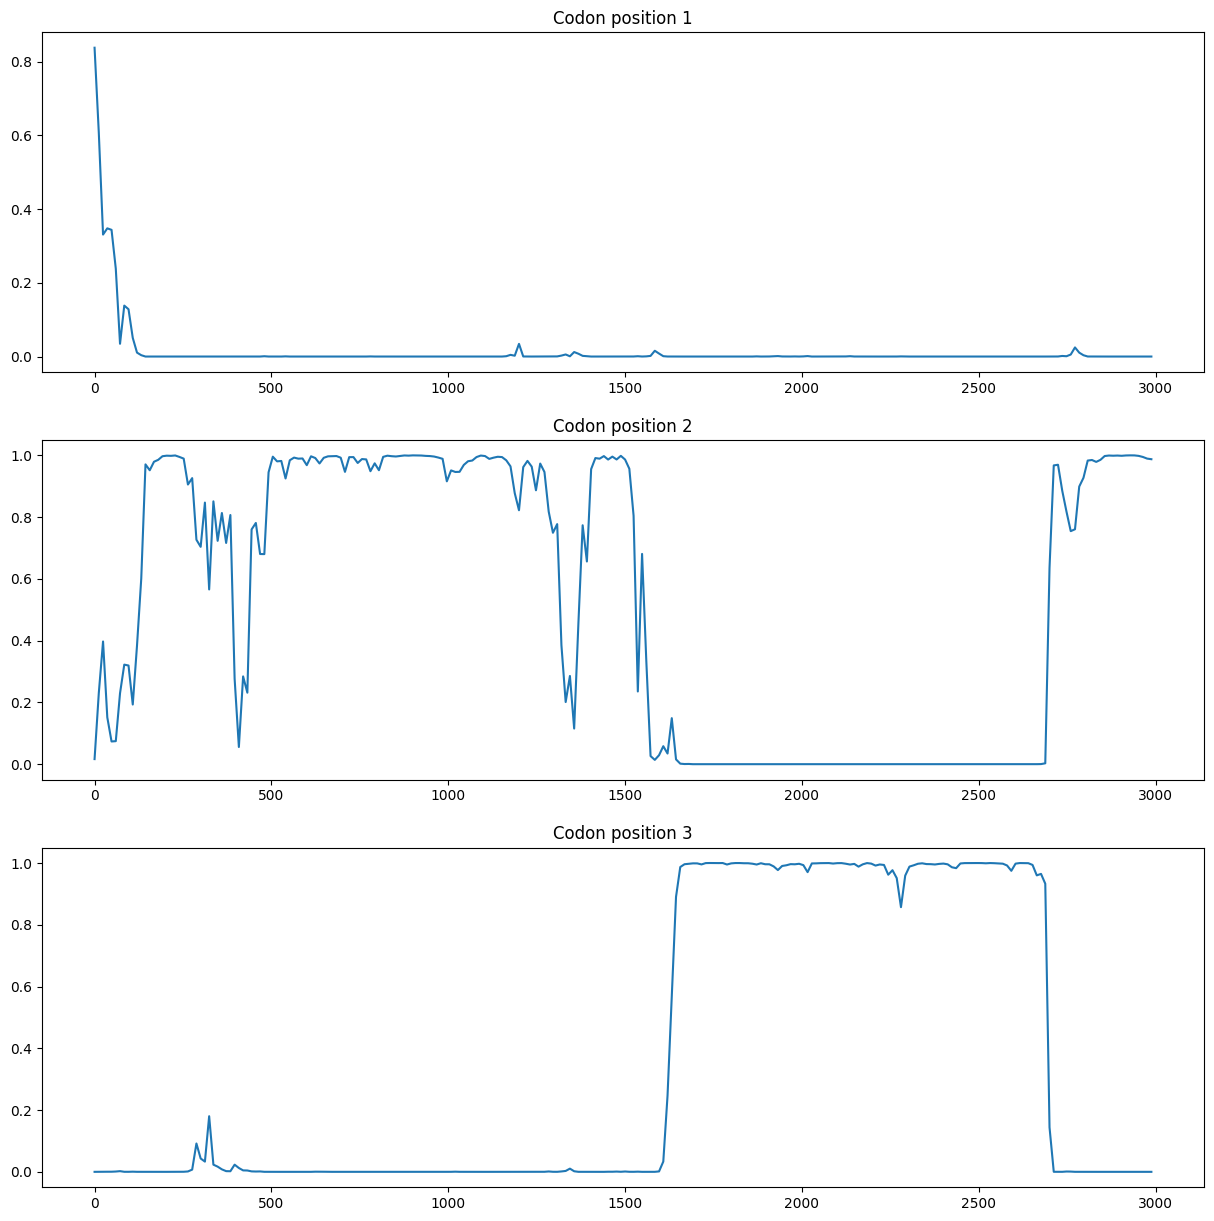

In [26]:
def plot_graph(seq, t1, t2, start, end, step, window):
    # Формируем три подграфика
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15))

    # Создаем диапозон обхода
    x = range(start, end, step)

    # Создаем результирующие списки для каждой из рамок
    prob1_values = []
    prob2_values = []
    prob3_values = []

    # Задаем равновероятными исходы для кодирующей и некодирующей последовательностей
    P_nc = 0.5
    P_cod = 0.5

    for i in x:
        # Тут совершаем переход от логарифмов через экспоненту
        prob1, prob2, prob3, probnc = map(np.exp, get_cod_probs(seq[i:i + window], t1, t2))

        # По теореме Байеса совершаем расчет и добавляем в лист результат
        prob1_values.append(P_cod * prob1 / (P_nc * probnc + P_cod * prob1 + P_cod * prob2 + P_cod * prob3))
        prob2_values.append(P_cod * prob2 / (P_nc * probnc + P_cod * prob1 + P_cod * prob2 + P_cod * prob3))
        prob3_values.append(P_cod * prob3 / (P_nc * probnc + P_cod * prob1 + P_cod * prob2 + P_cod * prob3))

    ax1.plot(x, prob1_values, label='Prob1')
    ax2.plot(x, prob2_values, label='Prob2')
    ax3.plot(x, prob3_values, label='Prob3')

    # Делаем подписи для каждого подграфика
    ax1.set_title('Codon position 1')
    ax2.set_title('Codon position 2')
    ax3.set_title('Codon position 3')

    plt.show()

start = 0
end = 3000
step = 12
window = 96

plot_graph(seq, t1, t2, start, end, step, window)


# Дополнительная часть:

## Добавим выделение на графике старт и стоп кодонов (2 балла)

#### Тут мы будем брать и искать в фичах кодирующие последовательности, после чего смотреть на вероятность для каждой рамки по координатам кодирующей последовательности, после чего визуализировать результат на той, где рамка более вероятна.

Беру я уже другой промежуток для интереса и демонстрации возможностей

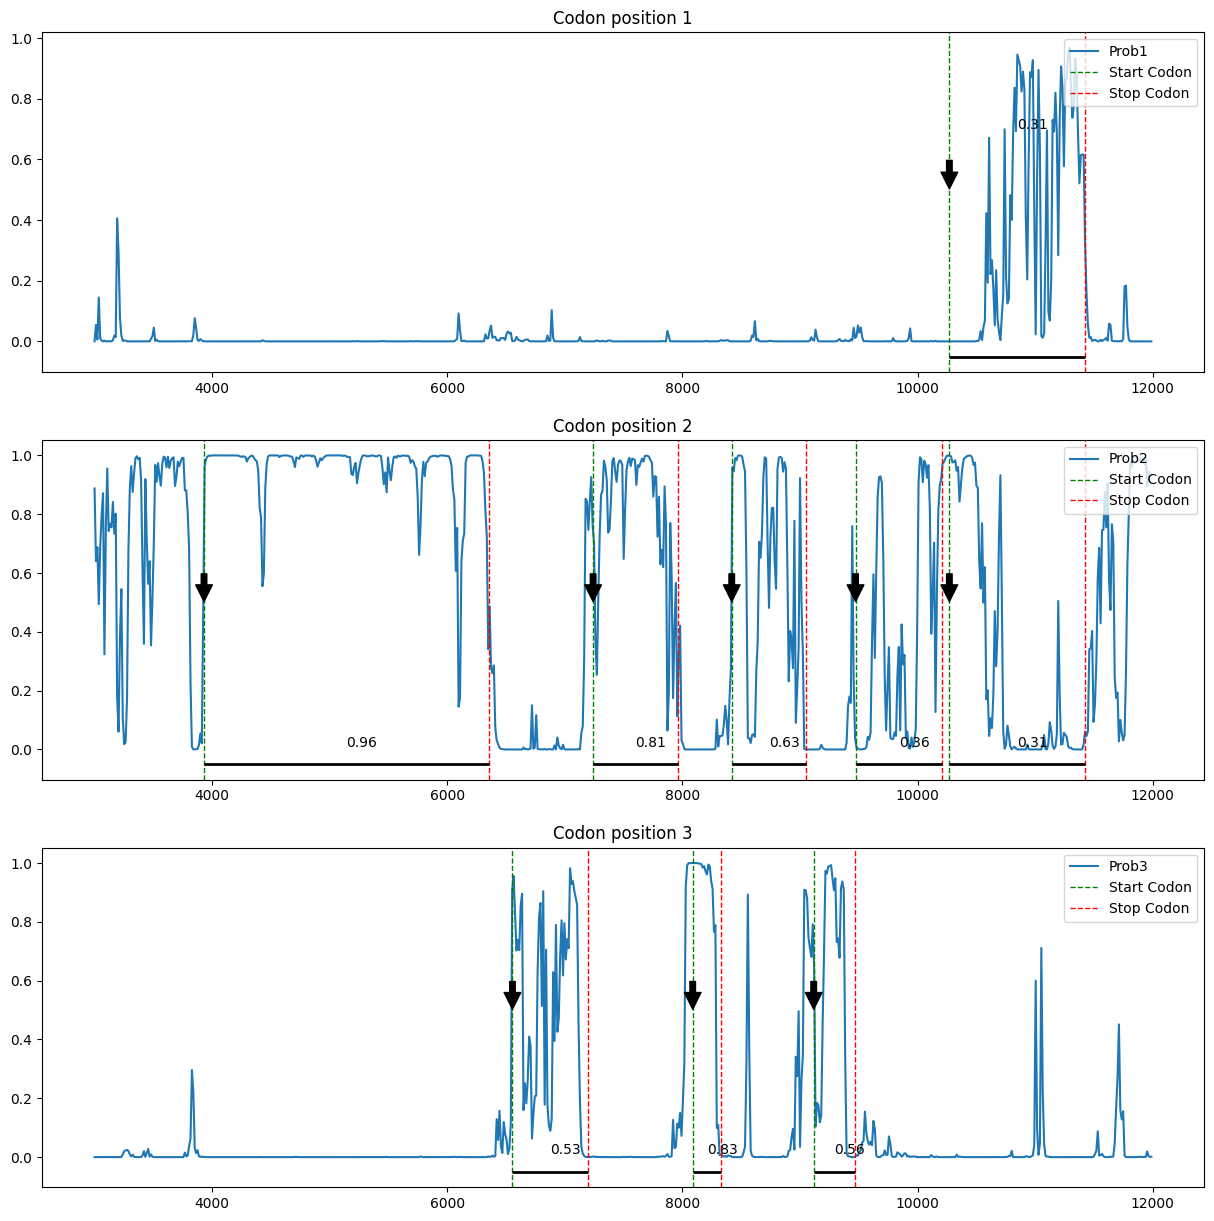

In [29]:
# Хотим узнать, для какой рамки вероятность последовательности, поэтому посчитаем в лоб по готовым результатам последовательностей.
def prob_counter(find_start, find_step, start_cod, end_cod, prob_list):
    # Вычисляем правильные индексы в наших рамках
    start_ind  = (start_cod - find_start - (start_cod  % find_step)) // find_step
    end_ind = (end_cod - find_start - (end_cod % find_step)) // find_step
    # Нормируем суммарную вероятность на количество
    return sum(prob_list[start_ind:end_ind]) / (end_ind - start_ind)


def plot_graph_tagged(seq, t1, t2, start, end, step, window):
    # Формируем три подграфика
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15))

    # Создаем диапозон обхода
    x = range(start, end, step)

    # Создаем результирующие списки для каждой из рамок
    prob1_values = []
    prob2_values = []
    prob3_values = []

    # Задаем равновероятными исходы для кодирующей и некодирующей последовательностей
    P_nc = 0.5
    P_cod = 0.5

    for i in x:
        # По теореме Байеса совершаем расчет и добавляем в лист результат
        prob1, prob2, prob3, probnc = map(np.exp, get_cod_probs(seq[i:i + window], t1, t2))
        prob1_values.append(P_cod * prob1 / (P_nc * probnc + P_cod * prob1 + P_cod * prob2 + P_cod * prob3))
        prob2_values.append(P_cod * prob2 / (P_nc * probnc + P_cod * prob1 + P_cod * prob2 + P_cod * prob3))
        prob3_values.append(P_cod * prob3 / (P_nc * probnc + P_cod * prob1 + P_cod * prob2 + P_cod * prob3))


    ax1.plot(x, prob1_values, label='Prob1')
    ax2.plot(x, prob2_values, label='Prob2')
    ax3.plot(x, prob3_values, label='Prob3')

    # Флаги для корректного отображения линий, чтобы их было не более пары.
    flag1, flag2, flag3 = False, False, False

    # Начинаем искать в фичах кодирующие последовательности
    for feature in gb.features:
        if feature.type == 'CDS' and feature.location.start <= end and start <= feature.location.start and feature.location.strand == 1:

            # Вытягиваем их начало и конец
            start_codon = feature.location.start
            end_codon = feature.location.end

            # Считаем по полученным раннее результатам вероятность для каждой рамки на координатах фичи
            range_prob1 = prob_counter(start, step, start_codon, end_codon, prob1_values)
            range_prob2 = prob_counter(start, step, start_codon, end_codon, prob2_values)
            range_prob3 = prob_counter(start, step, start_codon, end_codon, prob3_values)

            # Пороговая вероятность, по которой отсекаем варианты:
            border = 0.25

            if range_prob1 >= border:
              # Проверка, чтобы не допустить дублирования на легенде
              if not flag1:
                ax1.axvline(start_codon, color='green', linestyle='--', linewidth=1, label='Start Codon')
                ax1.axvline(end_codon, color='red', linestyle='--', linewidth=1, label='Stop Codon')
              else:
                ax1.axvline(start_codon, color='green', linestyle='--', linewidth=1)
                ax1.axvline(end_codon, color='red', linestyle='--', linewidth=1)

              # Визуализируем начало старт кодона стрелкой
              ax1.annotate("", xy=(start_codon, 0.5), xytext=(start_codon, 0.6),
                         arrowprops=dict(facecolor='black', shrink=0.03))
              # Визуализируем значение вероятности для участка:
              ax1.annotate(f'{range_prob2:.2f}', xy=((start_codon + end_codon) // 2, 0.1), xytext=((start_codon + end_codon) // 2, 0.7))

              # Соединяем горизонтальными линиями пары start-stop
              ax1.hlines(y=-0.05, xmin=start_codon, xmax=end_codon, color='black', linewidth=2)
              # Обновляем флаг
              flag1 = True

            if range_prob2 >= border:
              # Проверка, чтобы не допустить дублирования на легенде
              if not flag2:
                ax2.axvline(start_codon, color='green', linestyle='--', linewidth=1, label='Start Codon')
                ax2.axvline(end_codon, color='red', linestyle='--', linewidth=1, label='Stop Codon')
              else:
                ax2.axvline(start_codon, color='green', linestyle='--', linewidth=1)
                ax2.axvline(end_codon, color='red', linestyle='--', linewidth=1)

              # Визуализируем начало старт кодона стрелкой
              ax2.annotate("", xy=(start_codon, 0.5), xytext=(start_codon, 0.6),
                         arrowprops=dict(facecolor='black', shrink=0.03))
              # Визуализируем значение вероятности для участка:
              ax2.annotate(f'{range_prob2:.2f}', xy=((start_codon + end_codon) // 2, 0.01), xytext=((start_codon + end_codon) // 2, 0.01))

              # Соединяем горизонтальными линиями пары start-stop
              ax2.hlines(y=-0.05, xmin=start_codon, xmax=end_codon, color='black', linewidth=2)
              # Обновляем флаг
              flag2 = True

            if range_prob3 >= border:
              # Проверка, чтобы не допустить дублирования на легенде
              if not flag3:
                ax3.axvline(start_codon, color='green', linestyle='--', linewidth=1, label='Start Codon')
                ax3.axvline(end_codon, color='red', linestyle='--', linewidth=1, label='Stop Codon')
              else:
                ax3.axvline(start_codon, color='green', linestyle='--', linewidth=1)
                ax3.axvline(end_codon, color='red', linestyle='--', linewidth=1)

              # Визуализируем начало старт кодона стрелкой
              ax3.annotate("", xy=(start_codon, 0.5), xytext=(start_codon, 0.6),
                         arrowprops=dict(facecolor='black', shrink=0.03))
              # Визуализируем значение вероятности для участка:
              ax3.annotate(f'{range_prob3:.2f}', xy=((start_codon + end_codon) // 2, 0.01), xytext=((start_codon + end_codon) // 2, 0.01))

              # Соединяем горизонтальными линиями пары start-stop
              ax3.hlines(y=-0.05, xmin=start_codon, xmax=end_codon, color='black', linewidth=2)
              # Обновляем флаг
              flag3 = True


    ax1.set_title('Codon position 1')
    ax2.set_title('Codon position 2')
    ax3.set_title('Codon position 3')

    # Отображаем легенду на графике
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right')
    ax3.legend(loc='upper right')

    plt.show()

start = 3000
end = 12000
step = 12
window = 96

plot_graph_tagged(seq, t1, t2, start, end, step, window)

## Сделать возможным предсказание генов как на прямой, так и на обратной цепи (5 баллов)

#### Прежде всего нам необходимо получить последовательность нуклеотидов на - стренде, и посчитать для них таблицу вероятностей

In [30]:
# Получаем "-" стренд
neg_seq = seq.reverse_complement()

In [31]:
# Получаем таблицы вероятностей для "-" стренда. Берем последовательности только с "-" стренда!
neg_start, neg_end = gb.features[0].location.start, None

neg_ncod = []
neg_cod = []

# записываем кодирующие и некодирующие последовательности
for i in range(len(gb.features)):
  feature = gb.features[i]
  fseq = feature.extract(seq)
  end = feature.location.start

  # Добавили условие на "-" стренд.
  if feature.type == 'CDS' and fseq[:3] == 'ATG' and len(fseq) % 3 == 0 and feature.location.strand == -1:
    neg_cod.append(fseq.__str__())

    if len(seq[start:end]) != 0:
      neg_ncod.append(seq[start:end].__str__())

    start = feature.location.end

In [32]:
# Вычисляем таблицу для "стартового" нуклеотида
neg_t1 = make_table1(neg_cod, neg_ncod)
neg_t1

,pos1,pos2,pos3,nc
T,0.181828,0.298023,0.316531,0.266096
C,0.206346,0.226935,0.231408,0.225202
A,0.256863,0.300475,0.237797,0.269923
G,0.354963,0.174566,0.214264,0.238779


In [33]:
# Вычисляем таблицу для "цепочного" нуклеотида ^_^
neg_t2 = make_table2(neg_cod, neg_ncod)
neg_t2

,pos1,pos2,pos3,nc
T|T,0.185372,0.501706,0.317359,0.309056
C|T,0.189458,0.201046,0.177922,0.195711
A|T,0.249556,0.170303,0.220439,0.230247
G|T,0.375614,0.126944,0.284280,0.264986
T|C,0.186913,0.247904,0.274570,0.238349
C|C,0.156761,0.199027,0.242796,0.204002
A|C,0.274479,0.311616,0.241420,0.283186
G|C,0.381847,0.241453,0.241213,0.274463
T|A,0.180965,0.334768,0.305571,0.275552
C|A,0.193614,0.212201,0.192934,0.202634


In [34]:
# Реализуем получение вероятностей для "-" цепи уже через имеющуюся функцию get_cod_probs
def get_neg_cod_probs(neg_seq, t1, t2):
    # Получаем вероятности для "-" цепи, алгоритм такой же, как и для "+" цепи
    neg_prob1, neg_prob2, neg_prob3, neg_probnc = get_cod_probs(neg_seq, neg_t1, neg_t2)
    return neg_prob1, neg_prob2, neg_prob3, neg_probnc

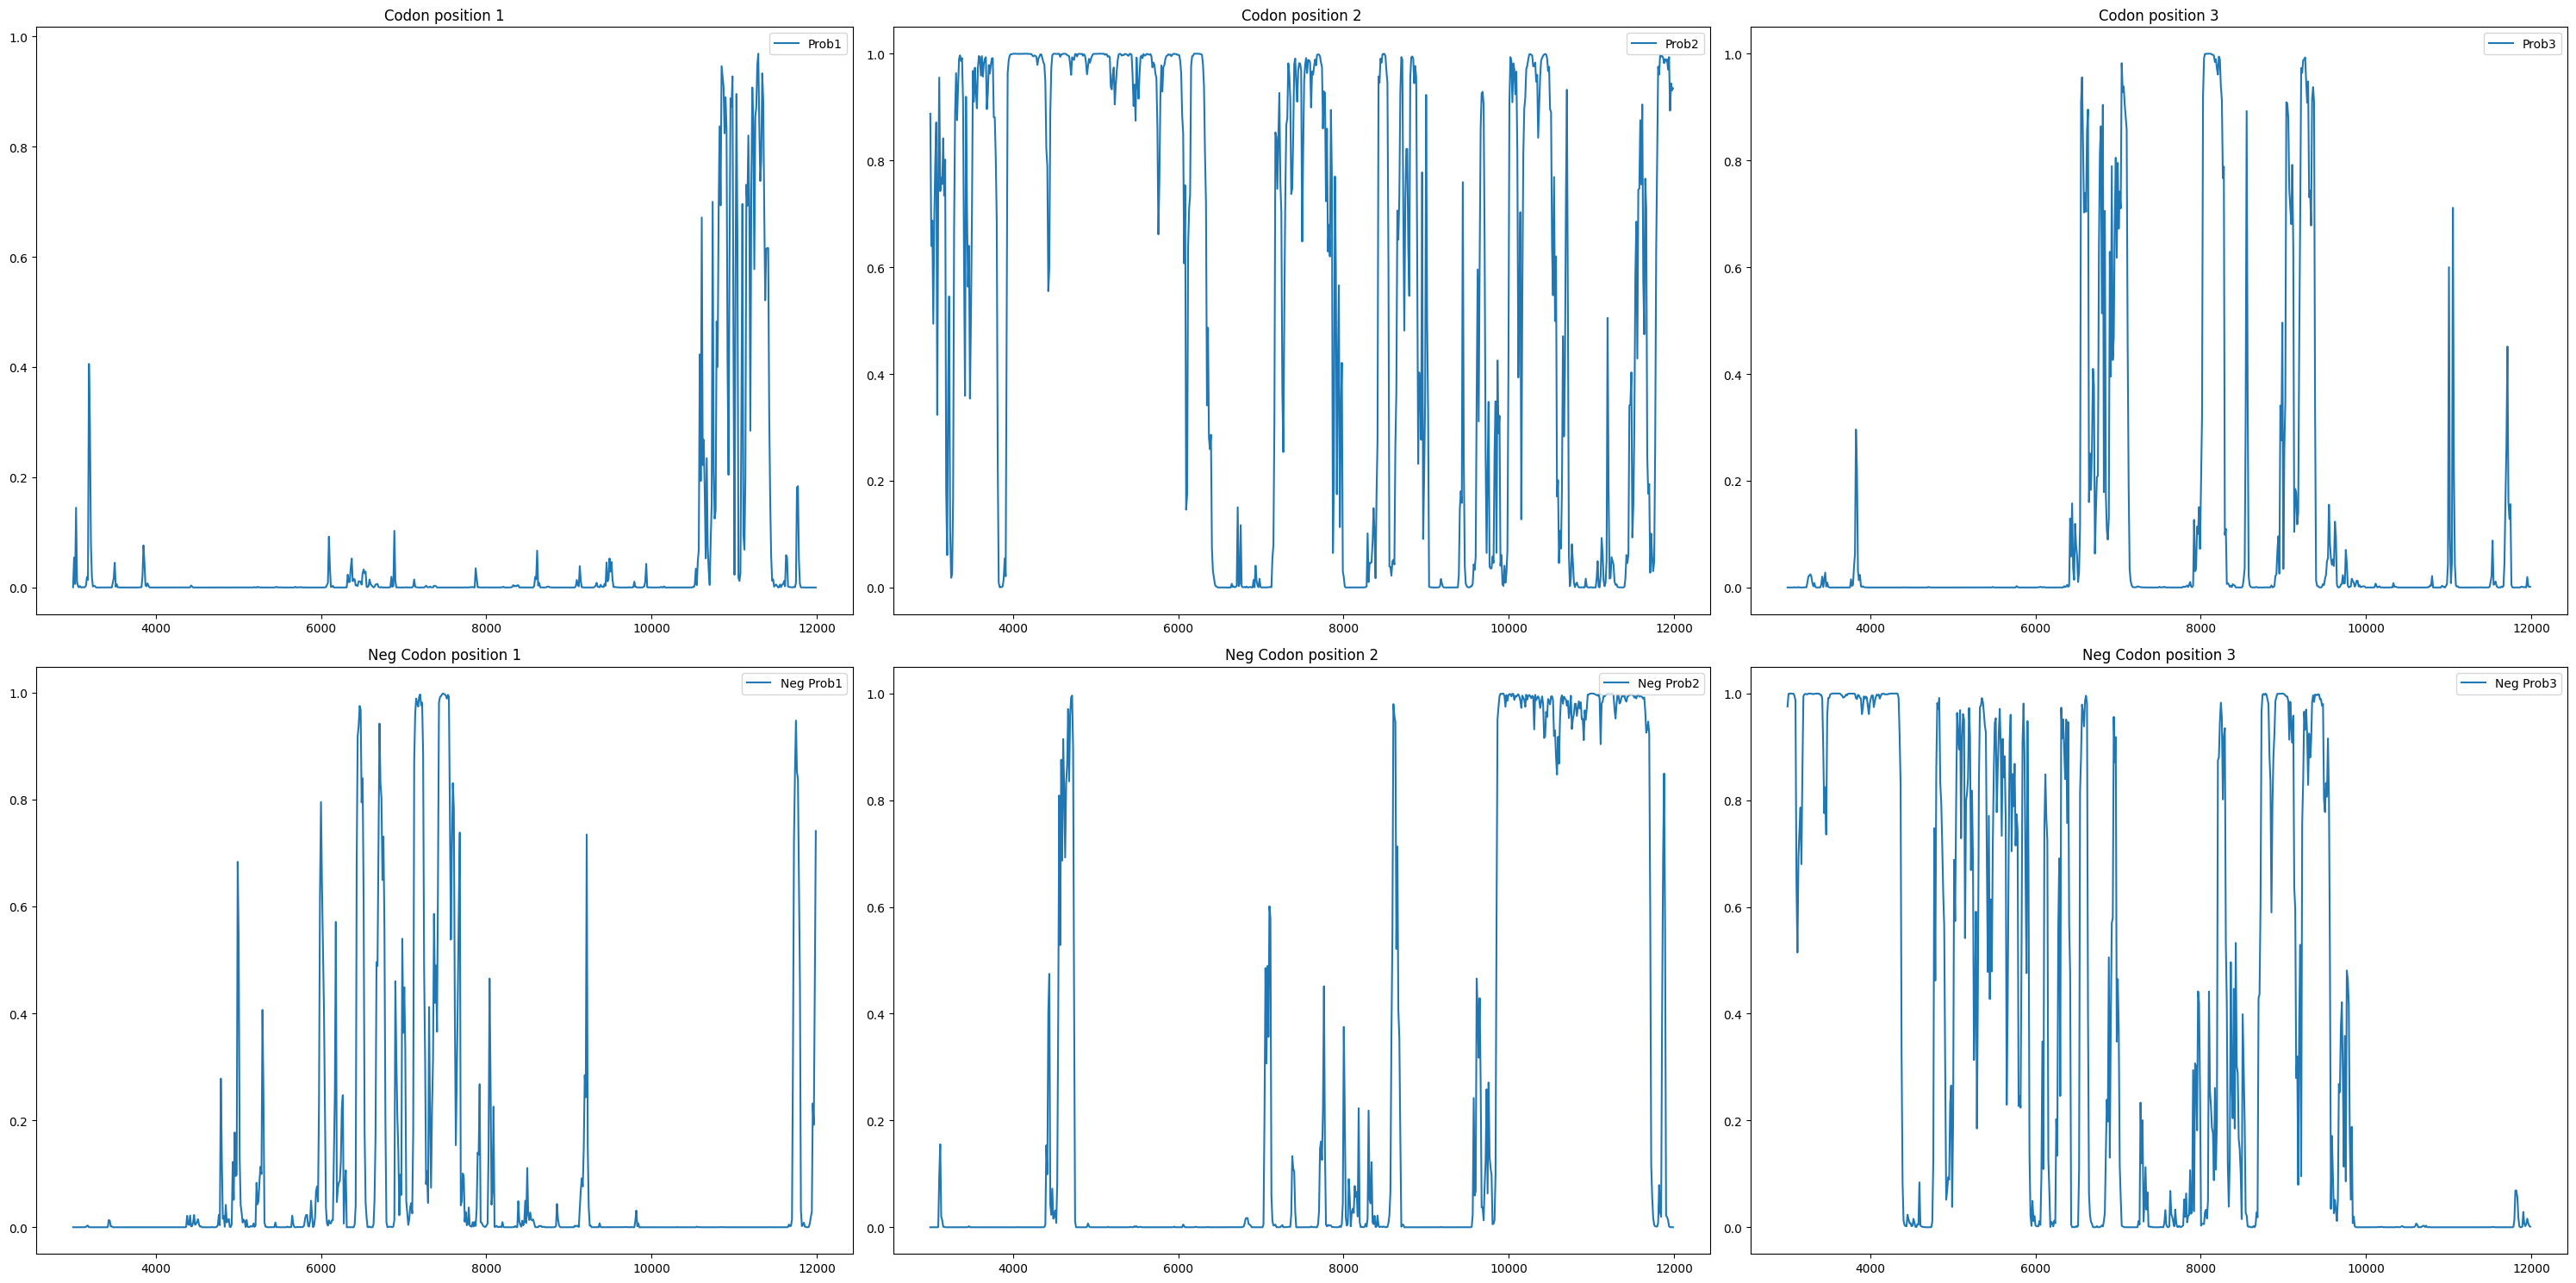

In [44]:
def plot_graph(seq, t1, t2, start, end, step, window):
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(30, 15))

    x = range(start, end, step)

    prob1_values = []
    prob2_values = []
    prob3_values = []

    neg_prob1_values = []
    neg_prob2_values = []
    neg_prob3_values = []

    P_nc = 0.5
    P_cod = 0.5

    for i in x:
        prob1, prob2, prob3, probnc = map(np.exp, get_cod_probs(seq[i:i + window], t1, t2))
        neg_prob1, neg_prob2, neg_prob3, neg_probnc = map(np.exp, get_neg_cod_probs(neg_seq[i:i + window], neg_t1, neg_t2))

        prob1_values.append(P_cod * prob1 / (P_nc * probnc + P_cod * prob1 + P_cod * prob2 + P_cod * prob3))
        prob2_values.append(P_cod * prob2 / (P_nc * probnc + P_cod * prob1 + P_cod * prob2 + P_cod * prob3))
        prob3_values.append(P_cod * prob3 / (P_nc * probnc + P_cod * prob1 + P_cod * prob2 + P_cod * prob3))

        neg_prob1_values.append(P_cod * neg_prob1 / (P_nc * neg_probnc + P_cod * neg_prob1 + P_cod * neg_prob2 + P_cod * neg_prob3))
        neg_prob2_values.append(P_cod * neg_prob2 / (P_nc * neg_probnc + P_cod * neg_prob1 + P_cod * neg_prob2 + P_cod * neg_prob3))
        neg_prob3_values.append(P_cod * neg_prob3 / (P_nc * neg_probnc + P_cod * neg_prob1 + P_cod * neg_prob2 + P_cod * neg_prob3))

    ax1.plot(x, prob1_values, label='Prob1')
    ax2.plot(x, prob2_values, label='Prob2')
    ax3.plot(x, prob3_values, label='Prob3')

    ax4.plot(x, neg_prob1_values, label='Neg Prob1')
    ax5.plot(x, neg_prob2_values, label='Neg Prob2')
    ax6.plot(x, neg_prob3_values, label='Neg Prob3')

    ax1.set_title('Codon position 1')
    ax2.set_title('Codon position 2')
    ax3.set_title('Codon position 3')

    ax4.set_title('Neg Codon position 1')
    ax5.set_title('Neg Codon position 2')
    ax6.set_title('Neg Codon position 3')

    for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
        ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

start = 3000
end = 12000
step = 12
window = 96

plot_graph(seq, t1, t2, start, end, step, window)


Также обновим визуализацию для "-" стренда! Многое будет аналогично, обновится код для проверки кодирующей последовательности!

30623 31256
31261 32068
32186 32642
32808 33423
35002 36268
39788 41183


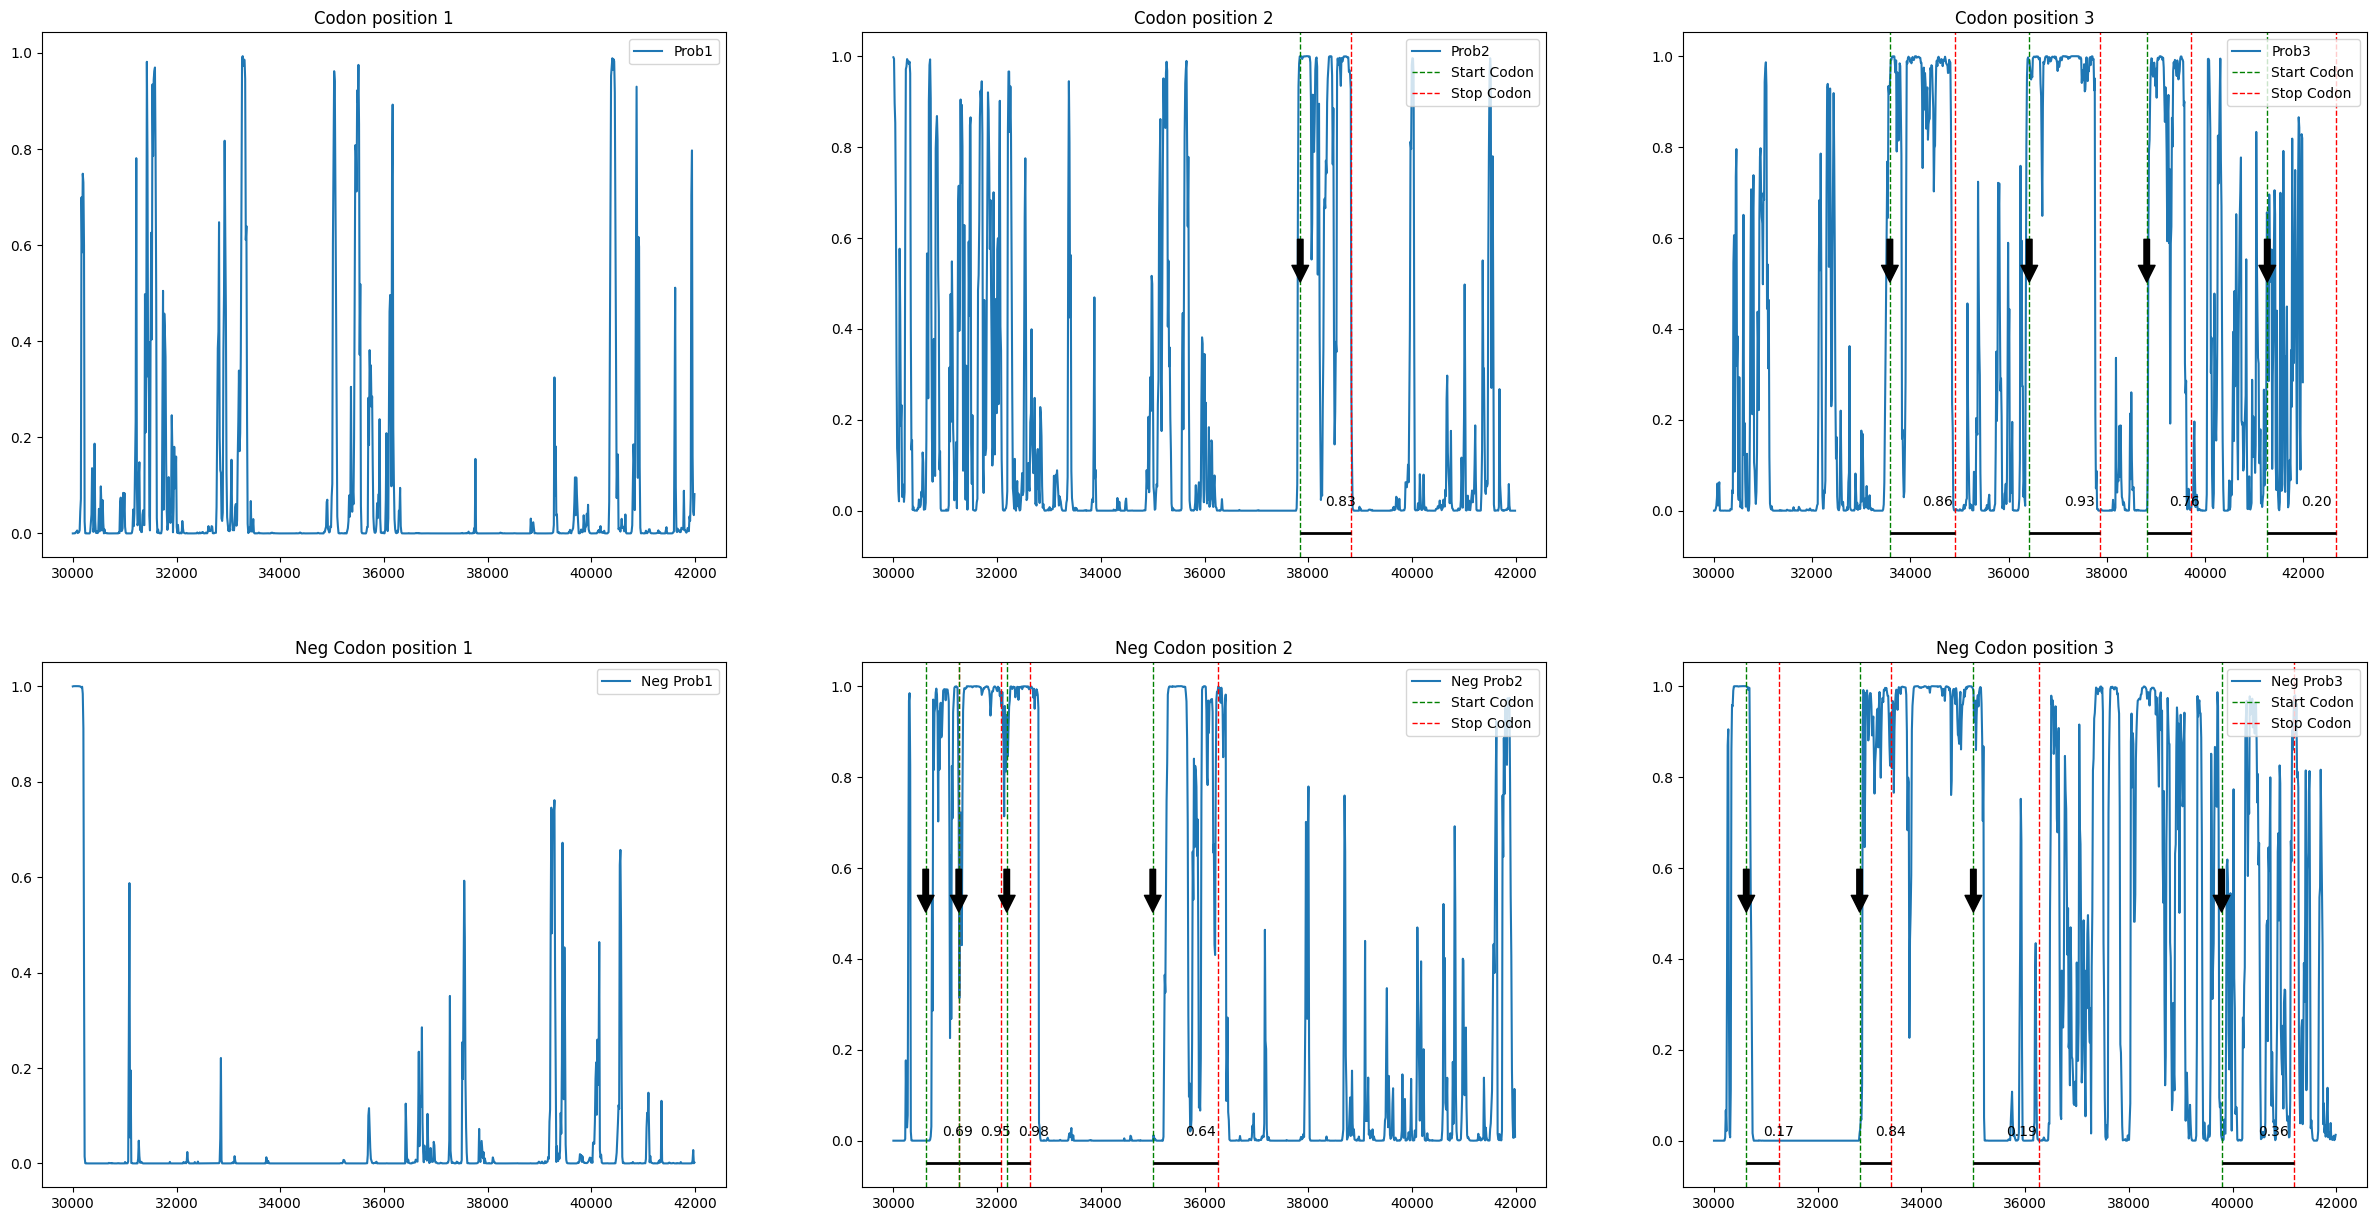

In [57]:
# Хотим узнать, для какой рамки вероятность последовательности, поэтому посчитаем в лоб по готовым результатам последовательностей.
def prob_counter(find_start, find_step, start_cod, end_cod, prob_list):
    # Вычисляем правильные индексы в наших рамках
    start_ind  = (start_cod - find_start - (start_cod  % find_step)) // find_step
    end_ind = (end_cod - find_start - (end_cod % find_step)) // find_step
    # Нормируем суммарную вероятность на количество
    return sum(prob_list[start_ind:end_ind]) / (end_ind - start_ind)


def plot_graph_tagged_neg(seq, t1, t2, start, end, step, window):
    # Формируем три подграфика
    ig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(30, 15))

    # Создаем диапозон обхода
    x = range(start, end, step)

    # Создаем результирующие списки для каждой из рамок
    prob1_values = []
    prob2_values = []
    prob3_values = []

    # Создаем результирующие списки для "минус" стренда в каждой из рамок
    neg_prob1_values = []
    neg_prob2_values = []
    neg_prob3_values = []

    # Задаем равновероятными исходы для кодирующей и некодирующей последовательностей
    P_nc = 0.5
    P_cod = 0.5

    for i in x:
        # По теореме Байеса совершаем расчет и добавляем в лист результат
        prob1, prob2, prob3, probnc = map(np.exp, get_cod_probs(seq[i:i + window], t1, t2))
        neg_prob1, neg_prob2, neg_prob3, neg_probnc = map(np.exp, get_neg_cod_probs(neg_seq[i:i + window], neg_t1, neg_t2))

        prob1_values.append(P_cod * prob1 / (P_nc * probnc + P_cod * prob1 + P_cod * prob2 + P_cod * prob3))
        prob2_values.append(P_cod * prob2 / (P_nc * probnc + P_cod * prob1 + P_cod * prob2 + P_cod * prob3))
        prob3_values.append(P_cod * prob3 / (P_nc * probnc + P_cod * prob1 + P_cod * prob2 + P_cod * prob3))

        neg_prob1_values.append(P_cod * neg_prob1 / (P_nc * neg_probnc + P_cod * neg_prob1 + P_cod * neg_prob2 + P_cod * neg_prob3))
        neg_prob2_values.append(P_cod * neg_prob2 / (P_nc * neg_probnc + P_cod * neg_prob1 + P_cod * neg_prob2 + P_cod * neg_prob3))
        neg_prob3_values.append(P_cod * neg_prob3 / (P_nc * neg_probnc + P_cod * neg_prob1 + P_cod * neg_prob2 + P_cod * neg_prob3))


    ax1.plot(x, prob1_values, label='Prob1')
    ax2.plot(x, prob2_values, label='Prob2')
    ax3.plot(x, prob3_values, label='Prob3')

    ax4.plot(x, neg_prob1_values, label='Neg Prob1')
    ax5.plot(x, neg_prob2_values, label='Neg Prob2')
    ax6.plot(x, neg_prob3_values, label='Neg Prob3')


    # ЧАСТЬ ДЛЯ "+" СТРЕНДА
    # Флаги для корректного отображения линий, чтобы их было не более пары.
    flag1, flag2, flag3 = False, False, False

    # Начинаем искать в фичах кодирующие последовательности, для + стренда
    for feature in gb.features:
        if feature.type == 'CDS' and feature.location.start <= end and start <= feature.location.start and feature.location.strand == 1:

            # Вытягиваем их начало и конец
            start_codon = feature.location.start
            end_codon = feature.location.end

            # Считаем по полученным раннее результатам вероятность для каждой рамки на координатах фичи
            range_prob1 = prob_counter(start, step, start_codon, end_codon, prob1_values)
            range_prob2 = prob_counter(start, step, start_codon, end_codon, prob2_values)
            range_prob3 = prob_counter(start, step, start_codon, end_codon, prob3_values)

            # Пороговая вероятность, по которой отсекаем варианты:
            border = 0.1

            if range_prob1 >= border:
              # Проверка, чтобы не допустить дублирования на легенде
              if not flag1:
                ax1.axvline(start_codon, color='green', linestyle='--', linewidth=1, label='Start Codon')
                ax1.axvline(end_codon, color='red', linestyle='--', linewidth=1, label='Stop Codon')
              else:
                ax1.axvline(start_codon, color='green', linestyle='--', linewidth=1)
                ax1.axvline(end_codon, color='red', linestyle='--', linewidth=1)

              # Визуализируем начало старт кодона стрелкой
              ax1.annotate("", xy=(start_codon, 0.5), xytext=(start_codon, 0.6),
                         arrowprops=dict(facecolor='black', shrink=0.03))
              # Визуализируем значение вероятности для участка:
              ax1.annotate(f'{range_prob2:.2f}', xy=((start_codon + end_codon) // 2, 0.1), xytext=((start_codon + end_codon) // 2, 0.7))

              # Соединяем горизонтальными линиями пары start-stop
              ax1.hlines(y=-0.05, xmin=start_codon, xmax=end_codon, color='black', linewidth=2)
              # Обновляем флаг
              flag1 = True

            if range_prob2 >= border:
              # Проверка, чтобы не допустить дублирования на легенде
              if not flag2:
                ax2.axvline(start_codon, color='green', linestyle='--', linewidth=1, label='Start Codon')
                ax2.axvline(end_codon, color='red', linestyle='--', linewidth=1, label='Stop Codon')
              else:
                ax2.axvline(start_codon, color='green', linestyle='--', linewidth=1)
                ax2.axvline(end_codon, color='red', linestyle='--', linewidth=1)

              # Визуализируем начало старт кодона стрелкой
              ax2.annotate("", xy=(start_codon, 0.5), xytext=(start_codon, 0.6),
                         arrowprops=dict(facecolor='black', shrink=0.03))
              # Визуализируем значение вероятности для участка:
              ax2.annotate(f'{range_prob2:.2f}', xy=((start_codon + end_codon) // 2, 0.01), xytext=((start_codon + end_codon) // 2, 0.01))

              # Соединяем горизонтальными линиями пары start-stop
              ax2.hlines(y=-0.05, xmin=start_codon, xmax=end_codon, color='black', linewidth=2)
              # Обновляем флаг
              flag2 = True

            if range_prob3 >= border:
              # Проверка, чтобы не допустить дублирования на легенде
              if not flag3:
                ax3.axvline(start_codon, color='green', linestyle='--', linewidth=1, label='Start Codon')
                ax3.axvline(end_codon, color='red', linestyle='--', linewidth=1, label='Stop Codon')
              else:
                ax3.axvline(start_codon, color='green', linestyle='--', linewidth=1)
                ax3.axvline(end_codon, color='red', linestyle='--', linewidth=1)

              # Визуализируем начало старт кодона стрелкой
              ax3.annotate("", xy=(start_codon, 0.5), xytext=(start_codon, 0.6),
                         arrowprops=dict(facecolor='black', shrink=0.03))
              # Визуализируем значение вероятности для участка:
              ax3.annotate(f'{range_prob3:.2f}', xy=((start_codon + end_codon) // 2, 0.01), xytext=((start_codon + end_codon) // 2, 0.01))

              # Соединяем горизонтальными линиями пары start-stop
              ax3.hlines(y=-0.05, xmin=start_codon, xmax=end_codon, color='black', linewidth=2)
              # Обновляем флаг
              flag3 = True


    ax1.set_title('Codon position 1')
    ax2.set_title('Codon position 2')
    ax3.set_title('Codon position 3')

    # Отображаем легенду на графике
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right')
    ax3.legend(loc='upper right')


    # ЧАСТЬ ДЛЯ "-" СТРЕНДА
    # Флаги для корректного отображения линий, чтобы их было не более пары.
    flag1, flag2, flag3 = False, False, False

    # Начинаем искать в фичах кодирующие последовательности, для + стренда
    for feature in gb.features:
        if feature.type == 'CDS' and feature.location.start <= end and start <= feature.location.start and feature.location.strand == -1:

            # Вытягиваем их начало и конец
            start_codon = feature.location.start
            end_codon = feature.location.end
            print(start_codon, end_codon)
            # Считаем по полученным раннее результатам вероятность для каждой рамки на координатах фичи
            neg_range_prob1 = prob_counter(start, step, start_codon, end_codon, neg_prob1_values)
            neg_range_prob2 = prob_counter(start, step, start_codon, end_codon, neg_prob2_values)
            neg_range_prob3 = prob_counter(start, step, start_codon, end_codon, neg_prob3_values)

            # Пороговая вероятность, по которой отсекаем варианты:
            border = 0.1

            if neg_range_prob1 >= border:
              # Проверка, чтобы не допустить дублирования на легенде
              if not flag1:
                ax4.axvline(start_codon, color='green', linestyle='--', linewidth=1, label='Start Codon')
                ax4.axvline(end_codon, color='red', linestyle='--', linewidth=1, label='Stop Codon')
              else:
                ax4.axvline(start_codon, color='green', linestyle='--', linewidth=1)
                ax4.axvline(end_codon, color='red', linestyle='--', linewidth=1)

              # Визуализируем начало старт кодона стрелкой
              ax4.annotate("", xy=(start_codon, 0.5), xytext=(start_codon, 0.6),
                         arrowprops=dict(facecolor='black', shrink=0.03))
              # Визуализируем значение вероятности для участка:
              ax4.annotate(f'{neg_range_prob1:.2f}', xy=((start_codon + end_codon) // 2, 0.1), xytext=((start_codon + end_codon) // 2, 0.7))

              # Соединяем горизонтальными линиями пары start-stop
              ax4.hlines(y=-0.05, xmin=start_codon, xmax=end_codon, color='black', linewidth=2)
              # Обновляем флаг
              flag1 = True

            if neg_range_prob2 >= border:
              # Проверка, чтобы не допустить дублирования на легенде
              if not flag2:
                ax5.axvline(start_codon, color='green', linestyle='--', linewidth=1, label='Start Codon')
                ax5.axvline(end_codon, color='red', linestyle='--', linewidth=1, label='Stop Codon')
              else:
                ax5.axvline(start_codon, color='green', linestyle='--', linewidth=1)
                ax5.axvline(end_codon, color='red', linestyle='--', linewidth=1)

              # Визуализируем начало старт кодона стрелкой
              ax5.annotate("", xy=(start_codon, 0.5), xytext=(start_codon, 0.6),
                         arrowprops=dict(facecolor='black', shrink=0.03))
              # Визуализируем значение вероятности для участка:
              ax5.annotate(f'{neg_range_prob2:.2f}', xy=((start_codon + end_codon) // 2, 0.01), xytext=((start_codon + end_codon) // 2, 0.01))

              # Соединяем горизонтальными линиями пары start-stop
              ax5.hlines(y=-0.05, xmin=start_codon, xmax=end_codon, color='black', linewidth=2)
              # Обновляем флаг
              flag2 = True

            if neg_range_prob3 >= border:
              # Проверка, чтобы не допустить дублирования на легенде
              if not flag3:
                ax6.axvline(start_codon, color='green', linestyle='--', linewidth=1, label='Start Codon')
                ax6.axvline(end_codon, color='red', linestyle='--', linewidth=1, label='Stop Codon')
              else:
                ax6.axvline(start_codon, color='green', linestyle='--', linewidth=1)
                ax6.axvline(end_codon, color='red', linestyle='--', linewidth=1)

              # Визуализируем начало старт кодона стрелкой
              ax6.annotate("", xy=(start_codon, 0.5), xytext=(start_codon, 0.6),
                         arrowprops=dict(facecolor='black', shrink=0.03))
              # Визуализируем значение вероятности для участка:
              ax6.annotate(f'{neg_range_prob3:.2f}', xy=((start_codon + end_codon) // 2, 0.01), xytext=((start_codon + end_codon) // 2, 0.01))

              # Соединяем горизонтальными линиями пары start-stop
              ax6.hlines(y=-0.05, xmin=start_codon, xmax=end_codon, color='black', linewidth=2)
              # Обновляем флаг
              flag3 = True


    ax4.set_title('Neg Codon position 1')
    ax5.set_title('Neg Codon position 2')
    ax6.set_title('Neg Codon position 3')

    # Отображаем легенду на графике
    ax4.legend(loc='upper right')
    ax5.legend(loc='upper right')
    ax6.legend(loc='upper right')

    # Ура, отображаем график
    plt.show()

# Параметры для визуализации. Подобрал такие, где есть гены и на + стренде, и на минус стренде
start = 30000
end = 42000
step = 12
window = 96

plot_graph_tagged_neg(seq, t1, t2, start, end, step, window)

Это я осознав дз
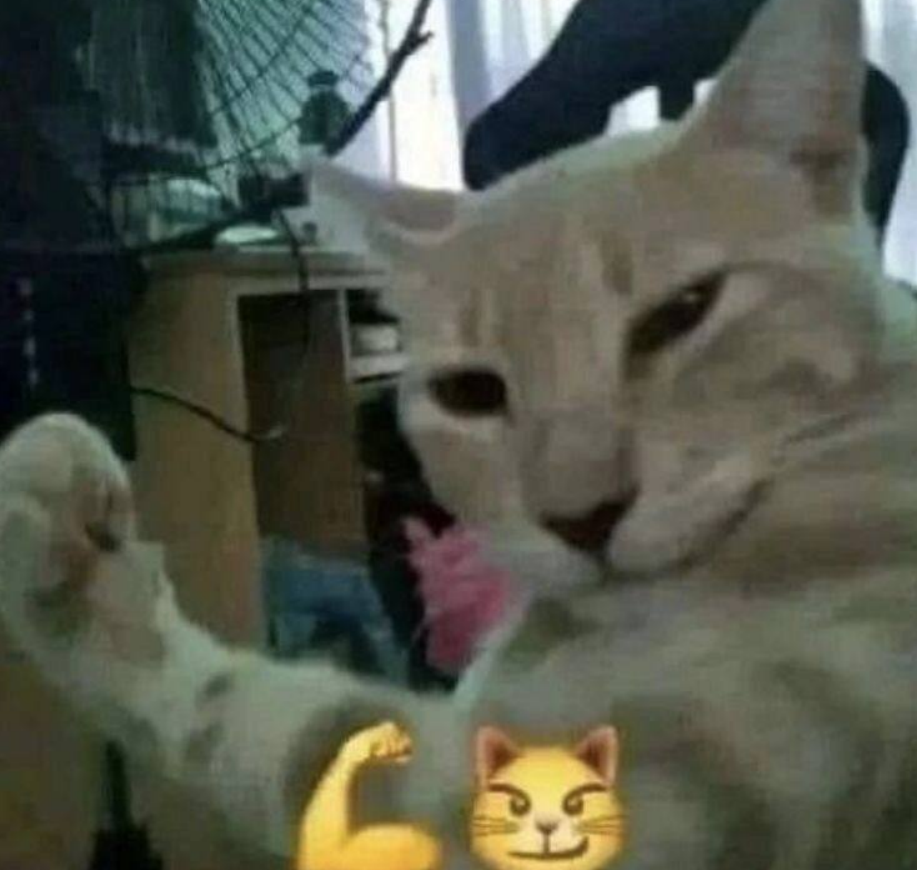